In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from pandas import DataFrame
from japanmap import picture
import folium

import numpy as np

from pylab import rcParams
from matplotlib import rcParams

import japanize_matplotlib

url ='https://www.stopcovid19.jp/data/covid19japan.json'

data = requests.get(url).json()
df = DataFrame(data['area'])
df

,name,name_jp,npatients,ncurrentpatients,nexits,ndeaths,nheavycurrentpatients,nunknowns,ninspections,ISO3155-2
0,Hokkaido,北海道,19890,700,18480,707,3,3,411199,JP-01
1,Aomori,青森県,859,43,796,20,0,0,21570,JP-02
2,Iwate,岩手県,564,9,525,30,0,0,29736,JP-03
3,Miyagi,宮城県,4055,350,3680,25,6,0,74298,JP-04
4,Akita,秋田県,269,1,262,6,0,0,7148,JP-05
5,Yamagata,山形県,554,15,524,15,0,0,28975,JP-06
6,Fukushima,福島県,2198,244,1859,95,10,0,126153,JP-07
7,Ibaraki,茨城県,6184,298,5765,121,4,0,25169,JP-08
8,Tochigi,栃木県,4284,148,4068,68,1,0,156383,JP-09
9,Gunma,群馬県,4693,128,4475,90,3,0,100905,JP-10


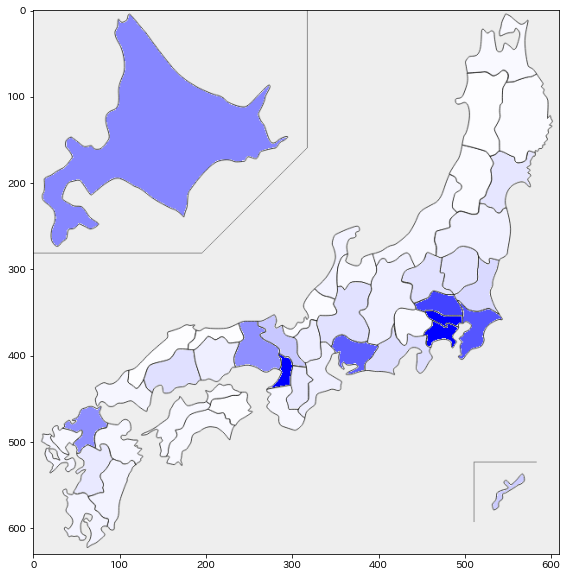

In [97]:
max = df['npatients'].max()
patients = {}
for item in data['area']:
    n = 255 - item['npatients'] / max * 700
    patients[item['name_jp']] = (n, n, 255)
    
rcParams['figure.figsize'] = (10,10)
plt.imshow(picture(patients))

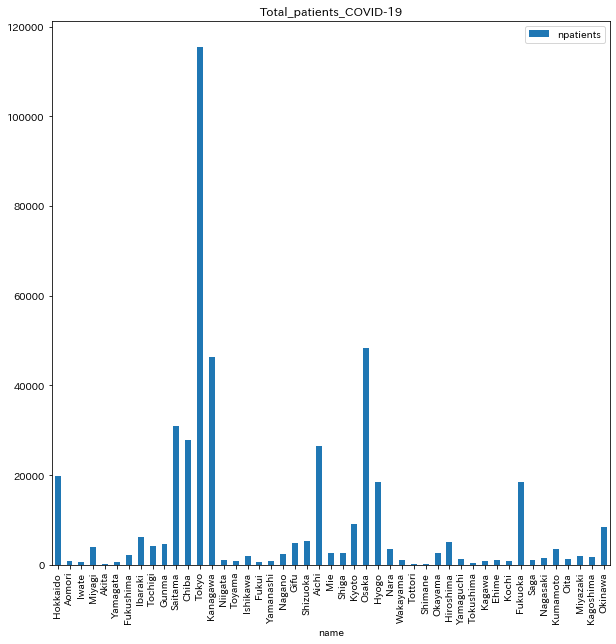

In [98]:
df.plot.bar(x='name',y='npatients', title='Total_patients_COVID-19');

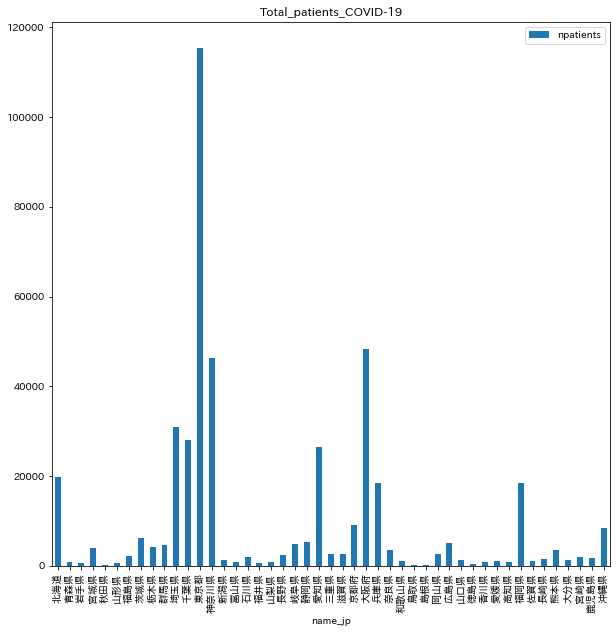

In [99]:
df.plot.bar(x='name_jp',y='npatients', title='Total_patients_COVID-19');

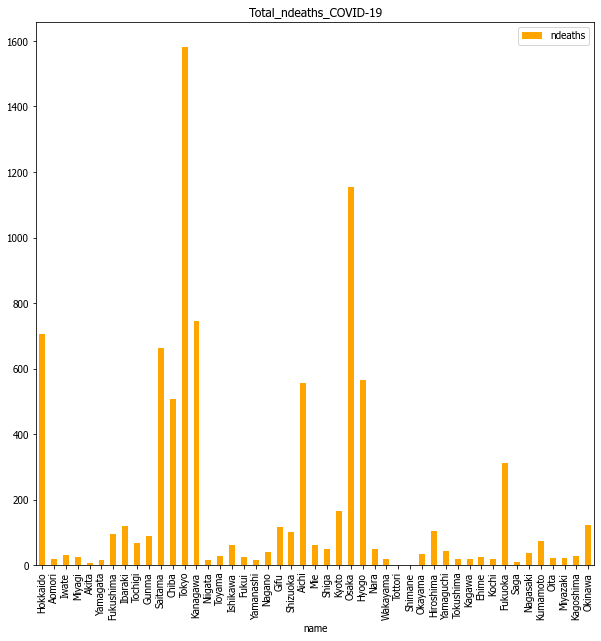

In [81]:
df.plot.bar(x='name',y='ndeaths', title='Total_ndeaths_COVID-19',color='orange');

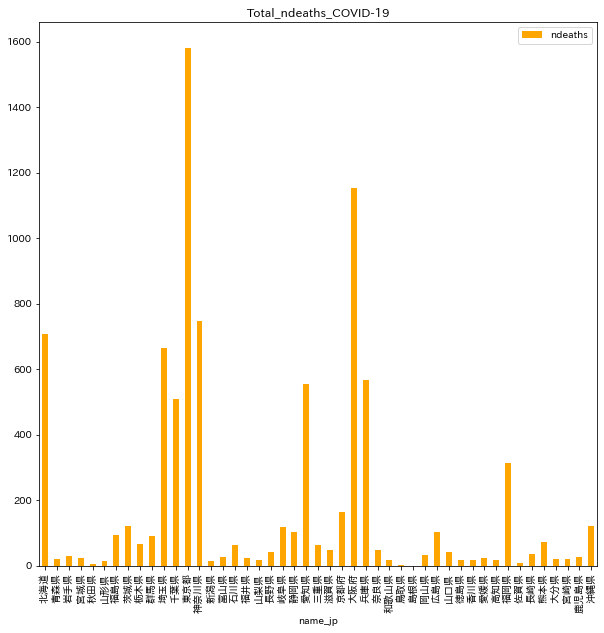

In [100]:
df.plot.bar(x='name_jp',y='ndeaths', title='Total_ndeaths_COVID-19',color='orange');

In [54]:
df = DataFrame(df[['name','npatients','ndeaths']])
df

,name,npatients,ndeaths
0,Hokkaido,19890,707
1,Aomori,859,20
2,Iwate,564,30
3,Miyagi,4055,25
4,Akita,269,6
5,Yamagata,554,15
6,Fukushima,2198,95
7,Ibaraki,6184,121
8,Tochigi,4284,68
9,Gunma,4693,90


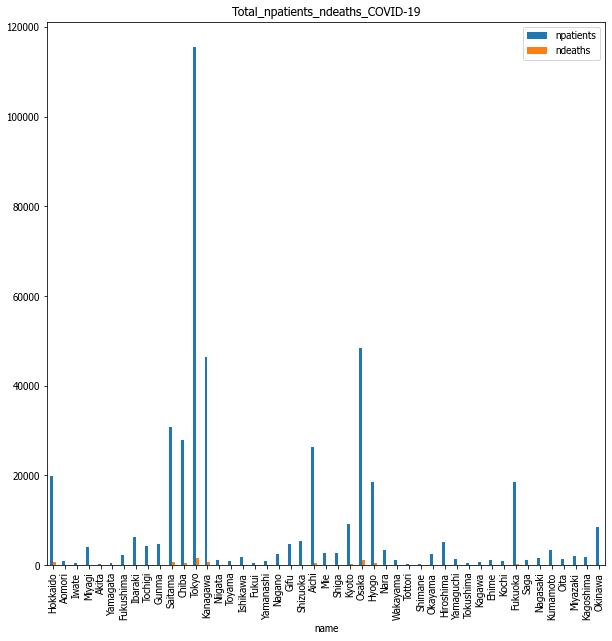

In [63]:
rcParams['figure.figsize'] = (10,10)
df.plot.bar(x='name',title='Total_npatients_ndeaths_COVID-19');

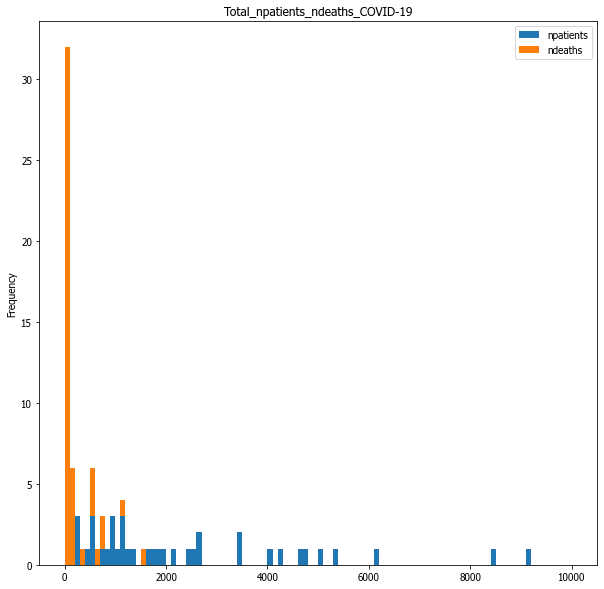

In [82]:
df.plot.hist(x='name',title='Total_npatients_ndeaths_COVID-19',bins=100, range=(0, 10000),stacked=True);

In [76]:
cor = df[['npatients','ndeaths']].corr()
cor

,npatients,ndeaths
npatients,1.000000,0.951938
ndeaths,0.951938,1.000000


<AxesSubplot:>

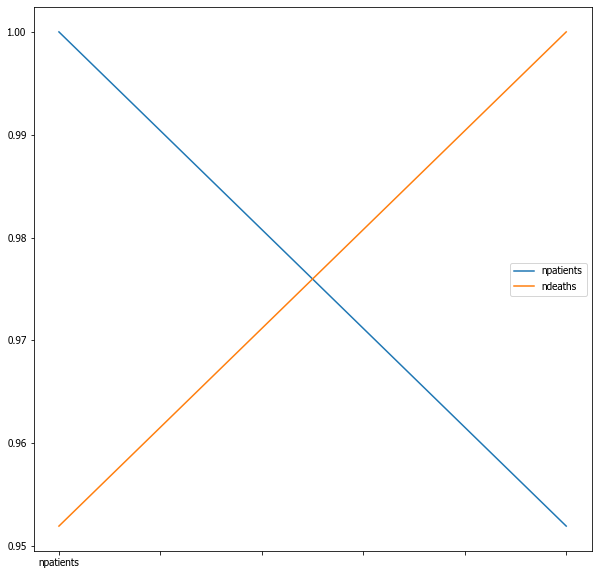

In [84]:
cor.plot()